## **Ali Darabi - 810100264**

## **AI - CA6**

In [1]:
from parsivar import Normalizer
from parsivar import Tokenizer
from parsivar import FindStems
import pandas as pd
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import homogeneity_score
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

### Reading Files:

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

with open('stop_words.txt', encoding='utf-8') as f:
    stop_words = f.read().splitlines() 

with open('marks.txt', encoding='utf-8') as f:
    mark_list = f.read().splitlines()

In [3]:
train_data.describe()

,label,content
count,9000,9000
unique,6,8980
top,فناوری,منبع: ایسنا
freq,1500,4


In [4]:
def tokenize_content(text):
  tokenizer = Tokenizer()
  return tokenizer.tokenize_words(text)

def apply_stem(text_list):
  stemmer = FindStems()
  return [stemmer.convert_to_stem(word) for word in text_list]

def remove_marks(text):
  for m in mark_list:
    text = text.replace(m, "")
  return text

def remove_stop_words(text_list):
  return [remove_marks(word) for word in text_list if ((remove_marks(word) not in stop_words) and (len(remove_marks(word)) > 0))]

### Tokenizing:

In [5]:
train_data['content'] = train_data['content'].apply(tokenize_content)
test_data['content'] = test_data['content'].apply(tokenize_content)

### Remove stop words:

In [6]:
train_data['content'] = train_data['content'].apply(remove_stop_words)
test_data['content'] = test_data['content'].apply(remove_stop_words)

### stemming:

In [7]:
train_data['content'] = train_data['content'].apply(apply_stem)
test_data['content'] = test_data['content'].apply(apply_stem)

In [8]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(train_data['content'])]
model = Doc2Vec(documents, vector_size=7, window=1, min_count=2, workers=8)

In [9]:
test_vectors = []
for i in range(len(test_data['content'])):
    vector = model.infer_vector(test_data['content'][i])
    test_vectors.append(vector)

train_vectors = []
for i in range(len(train_data['content'])):
    vector = model.infer_vector(train_data['content'][i])
    train_vectors.append(vector)

In [10]:
num_clusters = 6
kmeans = KMeans(n_clusters=num_clusters) 

kmeans.fit(train_vectors) 

true_labels = [label for label in test_data['label']]

cluster_pred = kmeans.predict(test_vectors)

homogeneity = homogeneity_score(true_labels, cluster_pred)

score = silhouette_score(test_vectors, cluster_pred)

print("Homogeneity: ", homogeneity)
print("Silhouette score:", score)

c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Homogeneity:  0.5370228227622937
Silhouette score: 0.2597462


In [11]:
dbscan = DBSCAN(eps=1.3, min_samples=13) 

dbscan.fit(train_vectors)

homogeneity = homogeneity_score(true_labels, dbscan.fit_predict(test_vectors))

silhouette = silhouette_score(test_vectors, dbscan.fit_predict(test_vectors))

print("Homogeneity:", homogeneity)
print("Silhouette:", silhouette)

Homogeneity: 0.14385760224508995
Silhouette: 0.07232304


In [12]:
pca = PCA(n_components=2) #We want 2 Dimensions.
test_vec_reduced = pca.fit_transform(test_vectors)
train_vec_reduced = pca.transform(train_vectors)

In [13]:
kMeansModel = KMeans(num_clusters)
kMeansModel.fit(train_vec_reduced)
kmean_clusters = kMeansModel.predict(test_vec_reduced)

dbscan = DBSCAN(eps=0.3, min_samples=7)
dbscan.fit(train_vec_reduced) 
dbscan_clusters = dbscan.fit_predict(test_vec_reduced)

c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


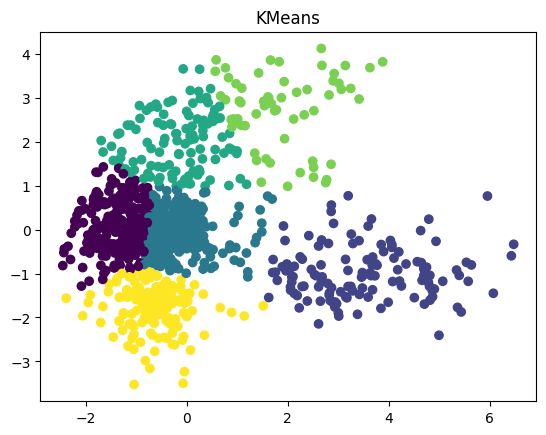

In [14]:
plt.scatter(test_vec_reduced[:,0], test_vec_reduced[:,1], c=kmean_clusters)
plt.title("KMeans")
plt.show()

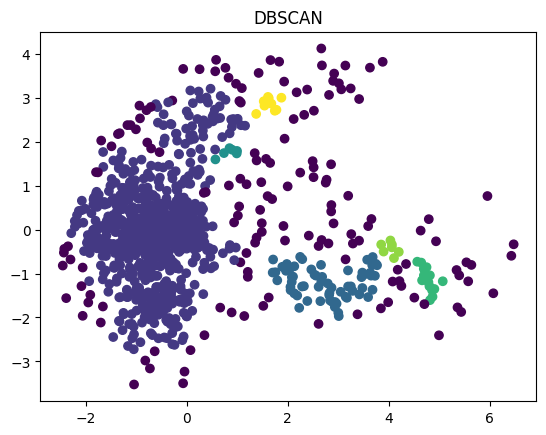

In [15]:
plt.scatter(test_vec_reduced[:,0], test_vec_reduced[:,1], c=dbscan_clusters) 
plt.title("DBSCAN")
plt.show()